## Regression on Ames Housing Dataset
You can find a description of the data here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%matplotlib inline

In [4]:
url = "http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls"
data = pd.read_excel(url)

#### 1.1 Visualize the univariate distribution of each continuous, and the distribution of the target. Do you notice anything? Is there something that you think might require special treatment (comment what it is, you’re not required to try to fix it).
Let us first isolate the continuous columns:

In [16]:
continuous = ['Lot Frontage',
              'Lot Area',
              'Mas Vnr Area',
              'BsmtFin SF 1',
              'BsmtFin SF 2',
              'Bsmt Unf SF',
              'Total Bsmt SF',
              '1st Flr SF',
              '2nd Flr SF',
              'Low Qual Fin SF',
              'Gr Liv Area',
              'Garage Area',
              'Wood Deck SF',
              'Open Porch SF',
              'Enclosed Porch',
              '3Ssn Porch',
              'Screen Porch',
              'Pool Area',
              'Misc Val']

In [17]:
target = 'SalePrice'

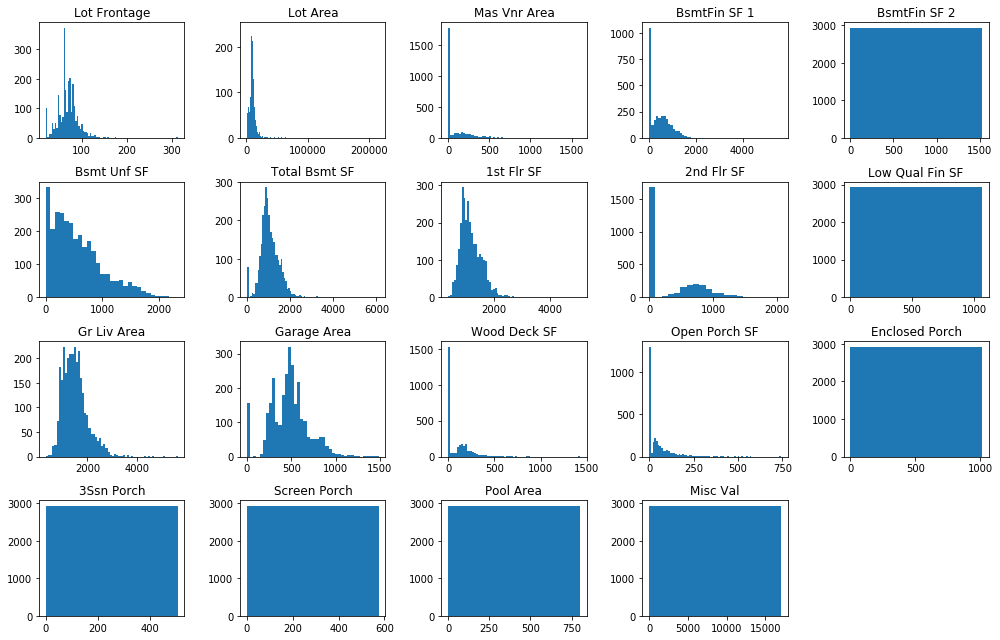

In [56]:
f, ax = plt.subplots(4, 5, figsize=(14, 9))
for i in range(len(continuous)):
    j = int(i/5)
    k = i%5
    var_name = continuous[i]
    var_not_nan = data.loc[~np.isnan(data[var_name]), var_name]
    ax[j,k].hist(var_not_nan, bins='auto')
    ax[j,k].set_title(var_name)
f.delaxes(ax[3,4])
plt.tight_layout()

Depending on the models we wish to implement, it might be a good idea to **scale the variables** as they span different intervals.

Also, the distribution of many of the features seems to be **highly skewed**(it is likely that there are many 0s). Before fitting the model, it will be better to try transforming them (Box-cox for examples) to reduce asymmetry in their distribution before fitting models.

Lastly, many variables appear to have outliers. It may be wise to explore the data further and investigate the existence of such outliers and possible reasons. Scaling strategies should depend on the investigation but one of the safest method, in the absence of useful information would be using the **robust scaler**. 

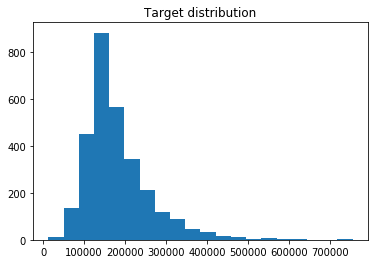

In [35]:
plt.hist(data[target], bins = 20)
plt.title('Target distribution')
plt.show()

#### 1.2 Visualize the dependency of the target on each continuous feature (2d scatter plot).¶

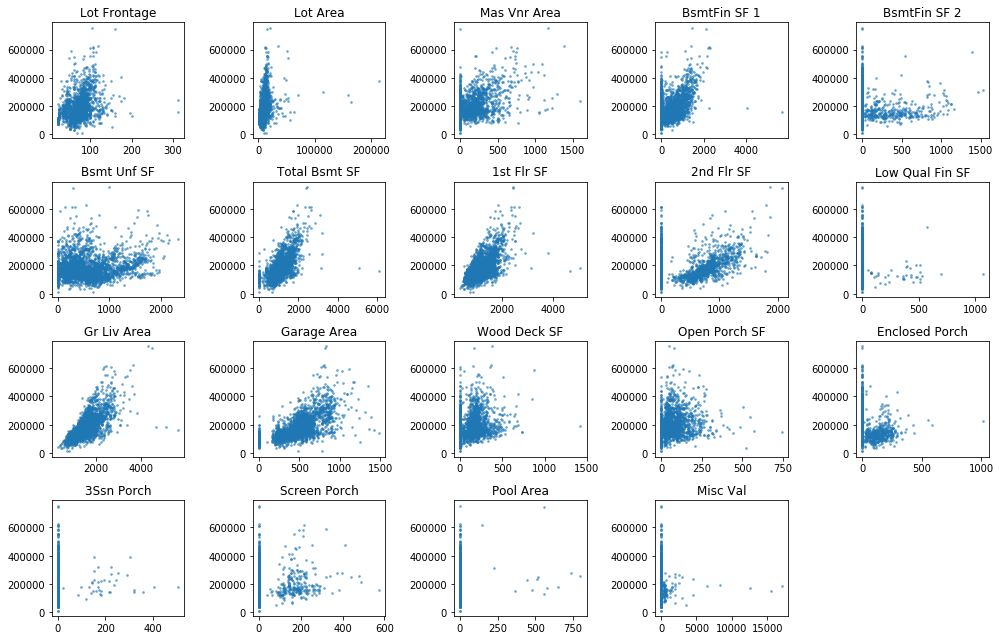

In [80]:
f, ax = plt.subplots(4, 5, figsize=(14, 9))
for i in range(len(continuous)):
    j = int(i/5)
    k = i%5
    if (j+1)*(k+1) < 20:
        var_name = continuous[i]
        var_not_nan = data.loc[~np.isnan(data[var_name]), var_name]
        target_not_nan = data.loc[~np.isnan(data[var_name]), target]
        ax[j,k].scatter(var_not_nan, target_not_nan, s=3, alpha=.5)
        ax[j,k].set_title(var_name)
f.delaxes(ax[3,4])
plt.tight_layout()

#### 1.3  Split data in training and test set.  For each categorical variable, cross-validate a Linear Regression model using just this variable (one-hot-encoded). Visualize the three categorical variables that provide the best R^2 value.

In [82]:
from sklearn.model_selection import train_test_split

In [84]:
y = data['SalePrice']
X = data.drop(['SalePrice'], axis = 1)

In [88]:
train, test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [96]:
categorical = list(set(train.columns) - set(continuous) - {'Order', 'PID'})

Before going any further, I will deal with missing data in the categofical variables by encoding them as their own category, 'N/A'. 

In [ ]:
train = train.replace(to_replace = {var: np.nan for var in categorical}, 'N/A')

Now let's 